7월 30일

In [2]:
#selenium 사용을 위한 library import

from selenium import webdriver as wb
from selenium.webdriver.common.by import By #요소 찾기 
from selenium.webdriver.common.keys import Keys #컴터 키보드

### 1) 키워드 설정 및 기간 설정하기

- f-string : 문자열 앞에 f 를 붙이고, 문자열 내부의 중괄호 안에 변수 표현식을 직접 넣어 사용할 수 있는 문자열 포메팅 방식이다

In [4]:
keyword = ' “음식물%20처리기”%20%2B내돈내산%20-협찬%7C제휴%7C광고%7C체험단%7C쿠폰'

start_date = '20250701'
end_date = '20250715' #기간이 길면 오래걸릴 수 있음 

blog_search_irl = f'https://search.naver.com/search.naver?ssc=tab.blog.all&query={keyword}&sm=tab_opt&nso=so%3Ar%2Cp%3Afrom{start_date}to{end_date}' 

### 2) 페이지 조회하고, 스크롤 내려보기 

In [3]:
# 1) 브라우저 실행하기 
driver = wb.Chrome()
# 2) 브라우저 창 최대화 하기 
driver.maximize_window()
# 3) 페이지 요청하기
url = 'https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EB%9F%AC%EB%8B%9D%ED%81%AC%EB%A3%A8+%EB%AF%BC%ED%8F%90'
driver.get(url) 

- time : 파이썬 내장 모듈, 시간과 다양한 기능을 제공하는 라이브러리 -> time.sleep()
- 웹페이지가 로딩이 아직 되지 않았거나, 동적 콘텐츠가 생성될 때까지 잠시 기다려야 할 때 사용
   - 만약 기다리지 않으면 로딩되지 않은 요소를 찾으려고 하다가 오류 발생 가능 

In [13]:
#4) 스크롤 3번 내리기 
import time


for i in range(10):
    body = driver.find_element(By.TAG_NAME, 'body')
    body.send_keys(Keys.END)
    time.sleep(1)

### 3. a태그에 있는 href 속성을 찾아서, href_list 리스트에 append 하기 

In [14]:
#1. a태그 찾기 
blog_titles = driver.find_elements(By.CLASS_NAME, 'title_link')
blog_titles


[<selenium.webdriver.remote.webelement.WebElement (session="00afd53507765b14e2670961ccf312fd", element="f.6FF365502417962E432A9D401DEEEDAE.d.92A233111C5227E54BB1B9EF6CB49972.e.1038")>,
 <selenium.webdriver.remote.webelement.WebElement (session="00afd53507765b14e2670961ccf312fd", element="f.6FF365502417962E432A9D401DEEEDAE.d.92A233111C5227E54BB1B9EF6CB49972.e.1063")>,
 <selenium.webdriver.remote.webelement.WebElement (session="00afd53507765b14e2670961ccf312fd", element="f.6FF365502417962E432A9D401DEEEDAE.d.92A233111C5227E54BB1B9EF6CB49972.e.1083")>,
 <selenium.webdriver.remote.webelement.WebElement (session="00afd53507765b14e2670961ccf312fd", element="f.6FF365502417962E432A9D401DEEEDAE.d.92A233111C5227E54BB1B9EF6CB49972.e.1131")>,
 <selenium.webdriver.remote.webelement.WebElement (session="00afd53507765b14e2670961ccf312fd", element="f.6FF365502417962E432A9D401DEEEDAE.d.92A233111C5227E54BB1B9EF6CB49972.e.1171")>,
 <selenium.webdriver.remote.webelement.WebElement (session="00afd53507765b1

In [15]:
#2. href를  href_list에 append하기 
href_list = []

#href 추출해야함. 
for i in blog_titles:
    href = i.get_attribute('href')
    href_list.append(href)

In [16]:
len(href_list)

140

### 4. 접속한 블로그 페이지의 내용 수집하기 

In [17]:
#href_list에 있는 첫번째 블로그 페이지를 요청하기 (get요청,href_list 인덱스)
driver.get(href_list[0])

In [18]:
#iframe으로 전환하기 
driver.switch_to.frame('mainFrame')

In [19]:
#제목 가져오기 : CLASS_NAME
title = driver.find_element(By.CLASS_NAME, 'se-fs-.se-ff-system')
title.text

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".se-fs-.se-ff-system"}
  (Session info: chrome=140.0.7339.128); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
	GetHandleVerifier [0x0x7ff7444230f5+79493]
	GetHandleVerifier [0x0x7ff744423150+79584]
	(No symbol) [0x0x7ff7441a01ba]
	(No symbol) [0x0x7ff7441f8067]
	(No symbol) [0x0x7ff7441f832c]
	(No symbol) [0x0x7ff74424be27]
	(No symbol) [0x0x7ff74422074f]
	(No symbol) [0x0x7ff744248b8b]
	(No symbol) [0x0x7ff7442204e3]
	(No symbol) [0x0x7ff7441e8e92]
	(No symbol) [0x0x7ff7441e9c63]
	GetHandleVerifier [0x0x7ff7446e0dbd+2954061]
	GetHandleVerifier [0x0x7ff7446db02a+2930106]
	GetHandleVerifier [0x0x7ff7446fb357+3061991]
	GetHandleVerifier [0x0x7ff74443d60e+187294]
	GetHandleVerifier [0x0x7ff74444557f+219919]
	GetHandleVerifier [0x0x7ff74442c294+116772]
	GetHandleVerifier [0x0x7ff74442c449+117209]
	GetHandleVerifier [0x0x7ff744412618+11176]
	BaseThreadInitThunk [0x0x7ffcd6ffe8d7+23]
	RtlUserThreadStart [0x0x7ffcd9048d9c+44]


In [20]:
#내용(본문) 가져오기 : CLASS_NAME
content = driver.find_element(By.CLASS_NAME, 'se-main-container')
content.text

'스포츠 러닝 크루에 대한 민폐 논란이 퍼지면서 공지문까지 등장\n최근 수십 명이 함께 뛰는 스포츠가 되는 러닝 크루가 유행하면서\n소음과 통행 방해 등 불편을 호소하는 시민들로 인하여 논란이 퍼진 상황\n서울 서초구는 10월 1일부터 반포종합운동장 안에서 5인 이상 단체 달리기를 제한했으며\n송파구는 석촌호수 산책로에 3인 이상 달리기 자제,\n성북구는 한 줄 달리기하라고 적힌 현수막을 각각 내걸었습니다.\n서초구 외에 서울 송파구도 석촌호수 산책로에\n3인 이상 러닝 자제를 요청하는 내용의 현수막을 내건 상태\n서울 성북구는 우측 보행과 한 줄 달리기라고 적힌 현수막을 써 붙였고\n경기 화성시는 동탄호수공원 산책로에 러닝 크루 출입 자제를 권고한 것으로\n최근 러닝 크루는 젊은 세대를 중심으로 유행처럼 번지고 있다.\n그러나 일부 러닝 크루들이 무리 지어 달리면서 사진을 찍겠다는 이유로\n인도나 도로를 가로막는 행위를 벌여 민폐 논란이 일었던 것\n일부는 공용으로 사용하는 체육 시설을 장악해 다른 시민들 이용에 불편을 초래하기도 했으며\n해당 사례에 시민 민원이 쏟아졌고 결국 지자체가 단체 이용 제한에 나서게 된 것\n러닝 크루가 건강한 운동 문화로 정착하기 위해선 서로에 대한 배려가 바탕이 돼야한다는 목소리가 높아지고 있다.\n출처 : KBS뉴스\n단체로 달리는 스포츠인 러닝 크루 관련으로 민폐 논란이 일면서 지자체가 달리기 제한 현수막을 내거는 곳이 증가\n다른게 아니라 이 러닝 크루를 즐기는 일부 사람들이 사진을 찍겠다는 이유로 인도나 도로를\n가로막거나 공용 체육 시설을 장악하는 등 민폐 행위를 펼친 경우가 꽤 있었던 모양이에요\n그래서 서초구와 송파구 그리고 성북구 측에서 저런 단체달리기 제한 현수막을 내건 모양\n스포츠를 즐기는건 절대 나쁜 건 아니지만서도 그게 다른 사람들에게 민폐가 된다면\n얼마든지 문제가 된다고 생각되는지라 이건 어쩔수 없나 봅니다.'

In [21]:
#날짜 가져오기 
date = driver.find_element(By.CSS_SELECTOR, '.se_publishDate.pcol2')
date.text

'2024. 10. 3. 16:50'

In [29]:
from tqdm import tqdm
# 수집한 데이터를 담을 리스트
df = []
# 실패한 URL과 오류 사유를 저장할 빈 리스트
failed_url = []  

# 브라우저 실행하기
driver = wb.Chrome()

# href_list 순회하며 데이터 수집하기
for href in tqdm(href_list):
    try:
        # 1) 페이지 요청하기
        driver.get(href)
        time.sleep(1)  # 페이지 로딩 대기

        # 2) iframe으로 전환하기
        driver.switch_to.frame('mainFrame')

        # 3) 제목 추출하기
        # title = driver.find_element(By.CLASS_NAME, 'se-fs-.se-ff-nanummaruburi').text
	
        # 4) 내용 추출하기
        content = driver.find_element(By.CLASS_NAME, 'se-main-container').text

        # 5) 날짜 추출하기
        date = driver.find_element(By.CSS_SELECTOR,'.se_publishDate.pcol2').text

        # 6) df 리스트에 제목, 내용, 날짜, URL 추가하기
        df.append([content, date, href])

    except Exception as e:
        # 오류 발생 시 failed_url에 href와 에러 사유 추가하기
        failed_url.append([href, str(e)])

# 7) 드라이버 종료하기
driver.quit()

# 결과 확인
df, failed_url

100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [07:37<00:00,  3.27s/it]


([['스포츠 러닝 크루에 대한 민폐 논란이 퍼지면서 공지문까지 등장\n최근 수십 명이 함께 뛰는 스포츠가 되는 러닝 크루가 유행하면서\n소음과 통행 방해 등 불편을 호소하는 시민들로 인하여 논란이 퍼진 상황\n서울 서초구는 10월 1일부터 반포종합운동장 안에서 5인 이상 단체 달리기를 제한했으며\n송파구는 석촌호수 산책로에 3인 이상 달리기 자제,\n성북구는 한 줄 달리기하라고 적힌 현수막을 각각 내걸었습니다.\n서초구 외에 서울 송파구도 석촌호수 산책로에\n3인 이상 러닝 자제를 요청하는 내용의 현수막을 내건 상태\n서울 성북구는 우측 보행과 한 줄 달리기라고 적힌 현수막을 써 붙였고\n경기 화성시는 동탄호수공원 산책로에 러닝 크루 출입 자제를 권고한 것으로\n최근 러닝 크루는 젊은 세대를 중심으로 유행처럼 번지고 있다.\n그러나 일부 러닝 크루들이 무리 지어 달리면서 사진을 찍겠다는 이유로\n인도나 도로를 가로막는 행위를 벌여 민폐 논란이 일었던 것\n일부는 공용으로 사용하는 체육 시설을 장악해 다른 시민들 이용에 불편을 초래하기도 했으며\n해당 사례에 시민 민원이 쏟아졌고 결국 지자체가 단체 이용 제한에 나서게 된 것\n러닝 크루가 건강한 운동 문화로 정착하기 위해선 서로에 대한 배려가 바탕이 돼야한다는 목소리가 높아지고 있다.\n출처 : KBS뉴스\n단체로 달리는 스포츠인 러닝 크루 관련으로 민폐 논란이 일면서 지자체가 달리기 제한 현수막을 내거는 곳이 증가\n다른게 아니라 이 러닝 크루를 즐기는 일부 사람들이 사진을 찍겠다는 이유로 인도나 도로를\n가로막거나 공용 체육 시설을 장악하는 등 민폐 행위를 펼친 경우가 꽤 있었던 모양이에요\n그래서 서초구와 송파구 그리고 성북구 측에서 저런 단체달리기 제한 현수막을 내건 모양\n스포츠를 즐기는건 절대 나쁜 건 아니지만서도 그게 다른 사람들에게 민폐가 된다면\n얼마든지 문제가 된다고 생각되는지라 이건 어쩔수 없나 봅니다.',
   '2024. 10. 3. 16:50',
   'https://blog.nave

In [30]:
    #6) df에 제목 , 내용 날짜 href 추가하기 
import pandas as pd
blog_df= pd.DataFrame(df, columns = ['content', 'date', 'URL'])
blog_df

,content,date,URL
0,스포츠 러닝 크루에 대한 민폐 논란이 퍼지면서 공지문까지 등장\n최근 수십 명이 함...,2024. 10. 3. 16:50,https://blog.naver.com/ptj0969/223605587995
1,"“비켜주세요!” 소리에 깜짝 놀란 시민들.\n“자전거도로까지 점령한 러닝크루, 이래...",2025. 9. 14. 5:00,https://blog.naver.com/soojin3607/224004522474
2,"잊을 만하면 기사에서 한 번씩 언급되는 것이\n""러닝크루, 민폐"" 키워드 이다.\n...",2025. 8. 20. 8:56,https://blog.naver.com/bubbly100/223975992654
3,안녕하세요\n성실함이 무기인\n새벽 러너너 미실초이입니다.\n러닝을 즐기는 사람들이...,2024. 10. 12. 11:10,https://blog.naver.com/rlfehdud/223614070351
4,"러닝크루 가입 전엔 이랬죠.\n“와, 매주 같이 달리면 꾸준히 할 수 있겠는데?”\...",2025. 7. 5. 23:56,https://blog.naver.com/allaboutsafety_/2239232...
...,...,...,...
134,오늘은 대한민국의 배우 진태현에 대해 살펴보겠습니다.\n진\n태현은 본명 김태현으로...,2025. 7. 27. 23:31,https://blog.naver.com/add-post/223949156233
135,대한민국에서는 러닝 열풍이 거세게 불고 있습니다.\n주말마다 한강과 도심 곳곳에서 ...,2025. 6. 15. 9:43,https://blog.naver.com/kimnotee/223899701542
136,러닝크루 민폐 논란 확산\n<쉬운 버전>\n코로나19 유행이 시작되면서 실외운동 인...,2025. 2. 10. 12:38,https://blog.naver.com/rcy419/223755134557
137,"안녕하세요, 넥스트 브리프의 윤슬입니다! 😊 최근 ""울면서 회사 안 다니려면 부동산...",2025. 5. 15. 18:34,https://blog.naver.com/zoo_dragon/223866775154


### 5. 내용 전처리하기

In [31]:
#str.re= place() :문자열에서 특정 문자나 문자열을 다른 문자로 바꿔주는 함수

blog_df['content']= blog_df['content'].str.replace('\n', '')
blog_df['content']
blog_df

,content,date,URL
0,스포츠 러닝 크루에 대한 민폐 논란이 퍼지면서 공지문까지 등장최근 수십 명이 함께 ...,2024. 10. 3. 16:50,https://blog.naver.com/ptj0969/223605587995
1,"“비켜주세요!” 소리에 깜짝 놀란 시민들.“자전거도로까지 점령한 러닝크루, 이래도 ...",2025. 9. 14. 5:00,https://blog.naver.com/soojin3607/224004522474
2,"잊을 만하면 기사에서 한 번씩 언급되는 것이""러닝크루, 민폐"" 키워드 이다.<관련기...",2025. 8. 20. 8:56,https://blog.naver.com/bubbly100/223975992654
3,안녕하세요성실함이 무기인새벽 러너너 미실초이입니다.러닝을 즐기는 사람들이 모여 함께...,2024. 10. 12. 11:10,https://blog.naver.com/rlfehdud/223614070351
4,"러닝크루 가입 전엔 이랬죠.“와, 매주 같이 달리면 꾸준히 할 수 있겠는데?”“재밌...",2025. 7. 5. 23:56,https://blog.naver.com/allaboutsafety_/2239232...
...,...,...,...
134,오늘은 대한민국의 배우 진태현에 대해 살펴보겠습니다.진태현은 본명 김태현으로 198...,2025. 7. 27. 23:31,https://blog.naver.com/add-post/223949156233
135,대한민국에서는 러닝 열풍이 거세게 불고 있습니다.주말마다 한강과 도심 곳곳에서 러닝...,2025. 6. 15. 9:43,https://blog.naver.com/kimnotee/223899701542
136,러닝크루 민폐 논란 확산<쉬운 버전>코로나19 유행이 시작되면서 실외운동 인기가 굉...,2025. 2. 10. 12:38,https://blog.naver.com/rcy419/223755134557
137,"안녕하세요, 넥스트 브리프의 윤슬입니다! 😊 최근 ""울면서 회사 안 다니려면 부동산...",2025. 5. 15. 18:34,https://blog.naver.com/zoo_dragon/223866775154


### 내용 저장하기

In [33]:
# 문자열 포매팅 방식 사용하기 : .format()활용햐보가
#csv 파일로 저장하기 : to_csv
import pandas as pd 

blog_df.to_csv("러닝크루_민폐.csv",encoding = 'utf-8-sig')

### 7. 워드클라우드 만들기 
1. 명사추출함수 정의하기 
2. 명사 리스트 추출(apply)
3. 단어별 빈도 계산기 (counter)
4. 워드클라우드 그려보기 (WordCloud,plt)

In [34]:
from konlpy.tag import Okt


In [35]:
# 1. 명사 추출 함수 정의하기
okt = Okt()

def extract_nouns(text):
    # 1) tag값이 'Noun'이고, len(word) >=2 것들만 반환하기
    # nouns 리스트에 append (조건을 만족하면)
    nouns = []
    
    # pos로 결과 값을 받아보면 : (단어, 품사)
    for word, tag in okt.pos(text):
        if tag == "Noun" and len(word) >= 2:
            nouns.append(word)
    return nouns

In [36]:
#2. 명사 리스트 추출
blog_df["nouns"] = blog_df["content"].apply(extract_nouns)
blog_df

,content,date,URL,nouns
0,스포츠 러닝 크루에 대한 민폐 논란이 퍼지면서 공지문까지 등장최근 수십 명이 함께 ...,2024. 10. 3. 16:50,https://blog.naver.com/ptj0969/223605587995,"[스포츠, 러닝, 크루, 대한, 민폐, 논란, 지문, 등장, 최근, 수십, 스포츠,..."
1,"“비켜주세요!” 소리에 깜짝 놀란 시민들.“자전거도로까지 점령한 러닝크루, 이래도 ...",2025. 9. 14. 5:00,https://blog.naver.com/soojin3607/224004522474,"[소리, 깜짝, 놀란, 시민, 자전거, 도로, 점령, 러닝, 크루, 건강, 운동, ..."
2,"잊을 만하면 기사에서 한 번씩 언급되는 것이""러닝크루, 민폐"" 키워드 이다.<관련기...",2025. 8. 20. 8:56,https://blog.naver.com/bubbly100/223975992654,"[만하, 기사, 언급, 러닝, 크루, 민폐, 워드, 관련, 기사, 아이스박스, 음료..."
3,안녕하세요성실함이 무기인새벽 러너너 미실초이입니다.러닝을 즐기는 사람들이 모여 함께...,2024. 10. 12. 11:10,https://blog.naver.com/rlfehdud/223614070351,"[무기, 새벽, 러너, 미실, 초이, 러닝, 사람, 러닝, 크루, 활동, 통해, 건..."
4,"러닝크루 가입 전엔 이랬죠.“와, 매주 같이 달리면 꾸준히 할 수 있겠는데?”“재밌...",2025. 7. 5. 23:56,https://blog.naver.com/allaboutsafety_/2239232...,"[러닝, 크루, 가입, 달리, 사람, 막상, 달리기, 사람, 경험, 활용, 오늘, ..."
...,...,...,...,...
134,오늘은 대한민국의 배우 진태현에 대해 살펴보겠습니다.진태현은 본명 김태현으로 198...,2025. 7. 27. 23:31,https://blog.naver.com/add-post/223949156233,"[오늘, 대한민국, 배우, 진태현, 대해, 진태현, 본명, 김태현, 서울특별시, 연..."
135,대한민국에서는 러닝 열풍이 거세게 불고 있습니다.주말마다 한강과 도심 곳곳에서 러닝...,2025. 6. 15. 9:43,https://blog.naver.com/kimnotee/223899701542,"[대한민국, 러닝, 열풍, 거세, 주말, 한강, 도심, 곳곳, 러닝, 사람, 거리,..."
136,러닝크루 민폐 논란 확산<쉬운 버전>코로나19 유행이 시작되면서 실외운동 인기가 굉...,2025. 2. 10. 12:38,https://blog.naver.com/rcy419/223755134557,"[러닝, 크루, 민폐, 논란, 확산, 버전, 코로나, 유행, 시작, 실외, 운동, ..."
137,"안녕하세요, 넥스트 브리프의 윤슬입니다! 😊 최근 ""울면서 회사 안 다니려면 부동산...",2025. 5. 15. 18:34,https://blog.naver.com/zoo_dragon/223866775154,"[넥스트, 브리프, 윤슬, 최근, 울면, 회사, 부동산, 장해, 자극, 이야기, 크..."


In [37]:
#3. 단어별 빈도 계산하기 (Counter)
from collections import Counter

all_nouns = []

#df["nouns"] 열에 있는 명사들을 하나씩 꺼내서 all_nouns 리스트에 추가할 것임 
for nouns in blog_df["nouns"]:
    all_nouns.extend(nouns)
    #extend : 여러 요소를 한번에 기존 리스트에 추가할 때 사용함 
    #append() 리스트 전체를 하나의 요소로 추가함, extend는 각 요소를 풀어서 하나씩 리스트에 이어 붙임. 

In [38]:
freq_dict = Counter(all_nouns)

In [39]:
#상이ㅜ 10개 단어 및 빈도 계산하기 
top10 = freq_dict.most_common(10)
top10

[('러닝', 1715),
 ('크루', 1093),
 ('사람', 443),
 ('달리기', 416),
 ('민폐', 322),
 ('운동', 314),
 ('공원', 214),
 ('이상', 192),
 ('단체', 192),
 ('문화', 183)]

In [48]:
#불용어 처리 : '음식물', '처리기' 
stopwords = ["러닝","크루"]

#새로운 필터링된 리스트 생성을 위한 빈 리스트
filtered_nouns = []

for nouns in all_nouns:
    #들어온 명사가 stopwords가 아니라면 , filtered_nouns에 append
    if nouns not in stopwords:
        filtered_nouns.append(nouns)

filtered_nouns

['스포츠',
 '대한',
 '민폐',
 '논란',
 '지문',
 '등장',
 '최근',
 '수십',
 '스포츠',
 '유행',
 '소음',
 '통행',
 '방해',
 '불편',
 '호소',
 '시민',
 '논란',
 '상황',
 '서울',
 '서초구',
 '반포',
 '종합',
 '운동장',
 '이상',
 '단체',
 '달리기',
 '제한',
 '송파구',
 '석촌호수',
 '산책로',
 '이상',
 '달리기',
 '자제',
 '성북구',
 '달리기',
 '현수막',
 '각각',
 '서초구',
 '서울',
 '송파구',
 '석촌호수',
 '산책로',
 '이상',
 '자제',
 '요청',
 '내용',
 '현수막',
 '상태',
 '서울',
 '성북구',
 '우측',
 '보행',
 '달리기',
 '현수막',
 '경기',
 '화성시',
 '동탄',
 '호수',
 '공원',
 '산책로',
 '출입',
 '자제',
 '권고',
 '최근',
 '세대',
 '중심',
 '유행',
 '번지',
 '일부',
 '무리',
 '사진',
 '이유',
 '인도',
 '도로',
 '행위',
 '민폐',
 '논란',
 '일부',
 '공용',
 '사용',
 '체육',
 '시설',
 '장악',
 '다른',
 '시민',
 '이용',
 '불편',
 '초래',
 '해당',
 '사례',
 '시민',
 '민원',
 '지자체',
 '단체',
 '이용',
 '제한',
 '운동',
 '문화',
 '정착',
 '위해',
 '서로',
 '대한',
 '배려',
 '바탕',
 '목소리',
 '출처',
 '뉴스',
 '단체',
 '스포츠인',
 '관련',
 '민폐',
 '논란',
 '일면',
 '지자체',
 '달리기',
 '제한',
 '현수막',
 '증가',
 '다른',
 '일부',
 '사람',
 '사진',
 '이유',
 '인도',
 '도로',
 '공용',
 '체육',
 '시설',
 '장악',
 '민폐',
 '행위',
 '경우',
 '모양',
 '서초구',
 '송파구',
 '성북구',
 '저런',
 '단체',


In [49]:
freq_dict = Counter(filtered_nouns)

top10 = freq_dict.most_common(10)
top10

[('사람', 443),
 ('달리기', 416),
 ('민폐', 322),
 ('운동', 314),
 ('공원', 214),
 ('이상', 192),
 ('단체', 192),
 ('문화', 183),
 ('활동', 182),
 ('시민', 173)]

In [50]:
#워드클라우드 그리기 위한 library import 하기 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [51]:
#워드클라우드 객체 만들기
wc = WordCloud(
    font_path ='C:/Windows/Fonts/malgunbd.ttf',
    background_color = 'white',
    width = 800,
    height = 600
).generate_from_frequencies(dict(freq_dict))
#generate_from_frequencies() :단어-빈도 딕셔너리를 바탕으로 워드클라우드를 생성해주는 함수
#freq_dict :(단어, 빈도) 쌍으로 있는 Counter 객체 -> 딕셔너리 형태로 변환이 필요하다 

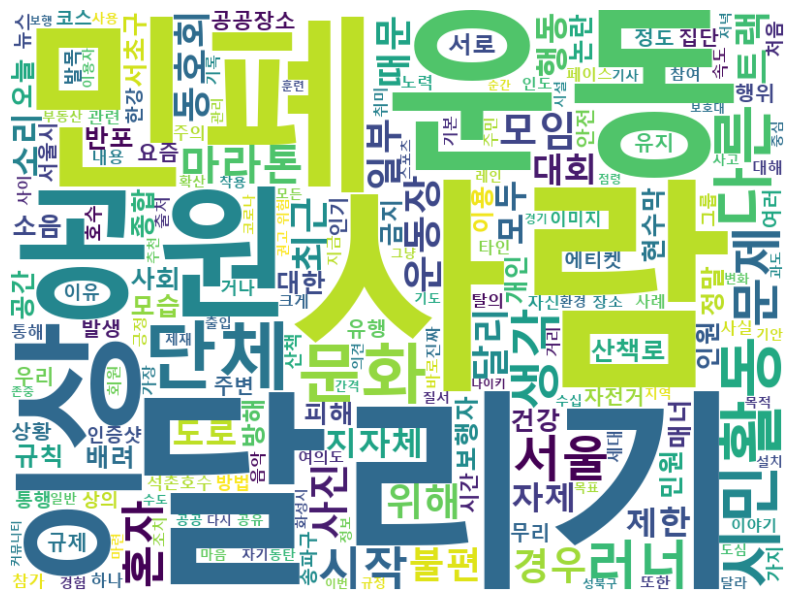

In [52]:
#워드클라우드 이미지 표시하기
plt.figure(figsize = (10,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()